# Kalp Hastalığı Keşifsel Veri Analizi

![Foto](https://www.medicalpark.com.tr/_uploads/_images/_healthGuide/YXyKXVBE.jpg)

Kalp hastalığı veri setinde birbirinden farklı sağlık verileri içeren bir veri setidir. (Diyabet geçirme durumu, Astımı bulunma durumu
Cilt kanseri olma durumu vb..)

 Veri setine aşağıya bıraktığım linkten ulaşıp veri seti hakkında daha detaylı bilgi edinebilirsiniz.

 https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease

##### Değişkenler
1. HeartDisease = Kalp hastalığı bulunup bulunmadığı. (Makine öğrenmesi modelinin tahmin etmesi gereken parametre)
2. BMI = Beden kitle indeksi
3. Smoking = Sigara kullanma durumu
4. AlcoholDrinking = Alkol tüketme durumu
5. Stroke = Daha önce atak geçirilme durumu
6. PhysicalHealth = Son 30 gün içerisinde kaç günün fiziksel (sakatlık, hastalık vb.) sağlığın kötü olma durumu
7. MentalHealth	= Son 30 gün içerisinde kaç günün mental (stres, depresyon vb.) sağlığın kötü olma durumu
8. DiffWalking = Yürüme veya merdiven çıkma esnasında zorlanma olma durumu
9. Sex = Cinsiyet
10. AgeCategory = Yaş kategorisi
11. Race = Irk
12. Diabetic = Diyabet olma durumu
13. PhysicalActivity = Fiziksel aktivite yapılma durumu
14. GenHealth = Genel olarak sağlınızın nasıl olduğunu düşünüyorsunuz? 
15. SleepTime = Ortalama uyku saati
16. Asthma = Astım bulunma durumu
17. KidneyDisease = Böbrek rahatsızlığı bulunma durumu
18. SkinCancer = Cilt kanseri bulunma durumu

### *GitHub ve Kaggle Hesaplarım*

https://github.com/asalomer1

 https://www.kaggle.com/asalomer1

## 0. Gerekli Kütüphanelerin Yüklenmesi ve Veri Setinin İçe Aktarımı

In [1]:
# Gerekli olan kütüphanelerin yüklenmesi
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy.stats import chi2_contingency, ttest_ind, f_oneway, pearsonr

import warnings 
warnings.filterwarnings('ignore') # Karşımıza çıkıcak kritik rol oynamayan hataları gizlemek için eklediğim modül.

In [2]:
#veri setinin içeri aktarımı
df_ = pd.read_csv("heart_2020_cleaned.csv")
df = df_.copy()
df.head(10) # Veri setinin ham haline kısa bir göz atmak için

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
6,No,21.63,No,No,No,15.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,Yes
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No
8,No,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
9,No,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No


In [3]:
# Veri setinde rasgele eksik veriler oluşturma

import random

def add_random_missing_values(dataframe: pd.DataFrame,
                              missing_rate: float = 0.05,
                              seed: random = 42) -> pd.DataFrame:
    """Turns random values to NaN in a DataFrame.
    
    To use this function, you need to import pandas, numpy and random libraries.

    Args:
        dataframe (pd.DataFrame): DataFrame to be processed.
        missing_rate (float): Percentage of missing value rate in float format. Defaults 0.05

    
    """
    # Get copy of dataframe
    df_missing = dataframe.copy()

    # Obtain size of dataframe and number total number of missing values
    df_size = dataframe.size
    num_missing = int(df_size * missing_rate)
    
    # Set seed
    if seed:
        random.seed(seed)

    # Get random row and column indexes to turn them NaN
    for _ in range(num_missing):
        row_idx = random.randint(0, dataframe.shape[0] - 1)
        col_idx = random.randint(0, dataframe.shape[1] - 1)

        df_missing.iat[row_idx, col_idx] = np.nan
        
    return df_missing

df = add_random_missing_values(dataframe = df,
                               missing_rate = 0.03)

## 1. Keşifsel Veri Analizi

".info()" fonksiyonu bize veri seti ile ilgili kısa ve öz bilgileri verir.

* Toplam 319795 satır ve 18 sütundan oluştuğunu gözlemleyebiliyoruz.
* 18 sütunun sadece 4 tanesi numerik değerlerden geri kalan 14 tanesi ise kategorik verilerden oluşuyor.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      310265 non-null  object 
 1   BMI               310380 non-null  float64
 2   Smoking           310320 non-null  object 
 3   AlcoholDrinking   310266 non-null  object 
 4   Stroke            310313 non-null  object 
 5   PhysicalHealth    310344 non-null  float64
 6   MentalHealth      310482 non-null  float64
 7   DiffWalking       310333 non-null  object 
 8   Sex               310430 non-null  object 
 9   AgeCategory       310230 non-null  object 
 10  Race              310548 non-null  object 
 11  Diabetic          310292 non-null  object 
 12  PhysicalActivity  310297 non-null  object 
 13  GenHealth         310243 non-null  object 
 14  SleepTime         310422 non-null  float64
 15  Asthma            310214 non-null  object 
 16  KidneyDisease     31

In [5]:
df.shape # Burada tekradan (satır, sütun) verilerini gözlemleyebiliriz.

(319795, 18)

In [6]:
df.dtypes # Sadece sütunlardaki veri türlerini görmek istersek.

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

".describe()" fonksiyonu bize sadece numerik verilerden oluşan istatiksel verileri gösterir. Bunu yukarda yazdığımız ".dtypes" fonksiyonun çıktısındaki "float64" tipindeki verilerden doğrulayabiliriz.

* Vücut kitle indeksinde en düşük indeks 12.02 en yükseği ise 94.85 olarak belirlenmiştir.
* Fiziksel ve mental sağlık açısından son 30 gün içerisinde hiçbir gün şikayeti olmayan olduğu gibi 30 gün şikayeti olan kişilerin olduğu görülmüştür
* Ortalama uyku süreleri çok ilginç bir şekilde en az 1 saat en fazla 24 saat olarak gözüküyor. Normal bir insana göre çok şaşırtıcı değerler olsa da eğer kişinin bir hastalık/rahatsızlık durumu varsa elbetteki olası durumlar.

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BMI,310380.0,28.321179,6.352891,12.02,24.03,27.32,31.41,94.85
PhysicalHealth,310344.0,3.368710,7.946462,0.00,0.00,0.00,2.00,30.00
MentalHealth,310482.0,3.901279,7.957674,0.00,0.00,0.00,3.00,30.00
SleepTime,310422.0,7.096498,1.435796,1.00,6.00,7.00,8.00,24.00


#### 1.1 Verilerin Düzenlenmesi

Bu kısımda verilerin daha kolay okulunabilir ve görselleştirilebilir olması adına sütunlardaki verilerin düzenlenme aşaması.
 
 Öncelikle "unique.()" fonksiyonu sütunlardaki farklı kategorik verileri belirledim. Daha sonrasında o sütundaki verileri görselleştirebilmesini
kolaylaştırma açısından onları "True-False" yani bir boolean değere veya 1'den başlayarak numaralandırdım.

In [8]:
df["GenHealth"].unique()

array(['Very good', 'Fair', 'Good', nan, 'Poor', 'Excellent'],
      dtype=object)

In [9]:
df["AgeCategory"].unique()

array(['55-59', '80 or older', '65-69', '75-79', nan, '70-74', '60-64',
       '50-54', '45-49', '18-24', '35-39', '40-44', '30-34', '25-29'],
      dtype=object)

In [10]:
df["Diabetic"].unique()

array(['Yes', 'No', 'No, borderline diabetes', nan,
       'Yes (during pregnancy)'], dtype=object)

In [11]:
df["Sex"].unique()

array(['Female', 'Male', nan], dtype=object)

In [12]:
df["Race"].unique()

array(['White', 'Black', nan, 'Asian', 'American Indian/Alaskan Native',
       'Other', 'Hispanic'], dtype=object)

In [13]:
GenHealt_new = {
    "Poor": 1,
    "Fair": 2,
    "Good": 3,
    "Very good": 4,
    "Excellent": 5
}

AgeCategory_new = {
    "18-24": 1,
    "25-29": 2,
    "30-34": 3,
    "35-39": 4,
    "40-44": 5,
    "45-49": 6,
    "50-54": 7,
    "55-59": 8,
    "60-64": 9,
    "65-69": 10,
    "70-74": 11,
    "75-79": 12,
    "80 or older": 13   
}

Diabetic_new = {
    "Yes": True,
    "No": False,
    "No, borderline diabetes": False,
    "Yes (during pregnancy)":True
}

Sex_new = {
    "Male":0,
    "Female":1
}

Race_new = {
    "White":1,
    "Black":2,
    "Asian":3,
    "American Indian/Alaskan Native":4,
    "Hispanic":5,
    "Other":6  
}

df["GenHealth"]=df["GenHealth"].replace(to_replace=GenHealt_new)
df["AgeCategory"]=df["AgeCategory"].replace(to_replace=AgeCategory_new)
df["Diabetic"] = df["Diabetic"].replace(to_replace=Diabetic_new)
df["Sex"] = df["Sex"].replace(to_replace=Sex_new)
df["Race"] = df["Race"].replace(to_replace=Race_new)

In [14]:
df["HeartDisease"]=df["HeartDisease"].replace({"No": 0, "Yes":1}) ## Bu veri seti için en önemli olan sütunu yani bir makine öğrenme modelinin çıktı olarak kullanacağı veriyi 1 ve 0 olarak düzenledim.

In [15]:
df.replace({"Yes": True, "No": False}, inplace=True) ## Veri Setindeki tüm "Yes-No" verilerini "True-False" olacak şekilde güncelledim.

#### 1.2 Eksik Verilerin İzlenmesi

In [16]:
df.isnull().sum() # Sütunlardaki toplam eksik veriler.

HeartDisease        9530
BMI                 9415
Smoking             9475
AlcoholDrinking     9529
Stroke              9482
PhysicalHealth      9451
MentalHealth        9313
DiffWalking         9462
Sex                 9365
AgeCategory         9565
Race                9247
Diabetic            9503
PhysicalActivity    9498
GenHealth           9552
SleepTime           9373
Asthma              9581
KidneyDisease       9378
SkinCancer          9425
dtype: int64

In [17]:
eksik_yuzdelik = (df.isnull().sum() / len(df) ) * 100
eksik_yuzdelik ## Sütundaki eksik verilerin o sütundaki toplam veriye yüzdelik oranı

HeartDisease        2.980034
BMI                 2.944074
Smoking             2.962836
AlcoholDrinking     2.979721
Stroke              2.965024
PhysicalHealth      2.955331
MentalHealth        2.912178
DiffWalking         2.958770
Sex                 2.928439
AgeCategory         2.990979
Race                2.891540
Diabetic            2.971591
PhysicalActivity    2.970028
GenHealth           2.986913
SleepTime           2.930940
Asthma              2.995982
KidneyDisease       2.932504
SkinCancer          2.947201
dtype: float64

In [18]:
tumeksik_yuzdelik = (df.isnull().sum().sum() / df.size) * 100
print(f"Eksik verilerin tüm verilere oranı: {tumeksik_yuzdelik}")

Eksik verilerin tüm verilere oranı: 2.9557824370126


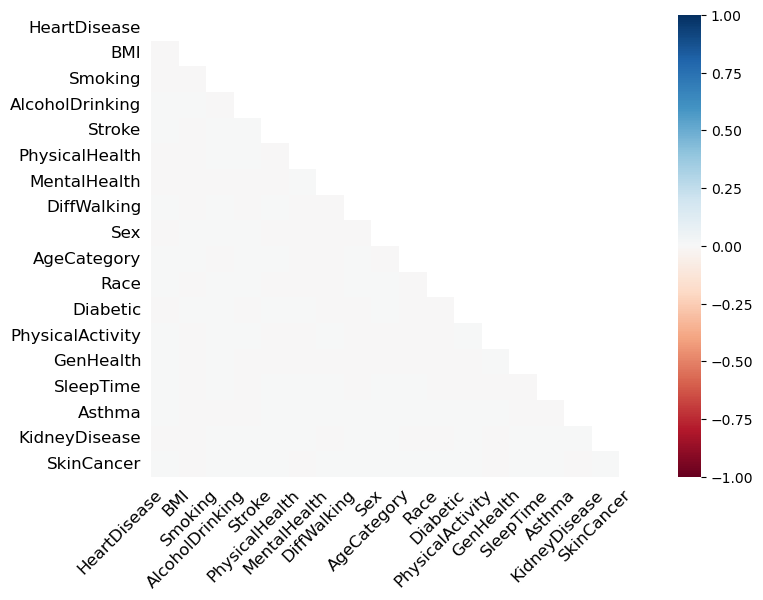

In [19]:
## Sıfır Sıralı Korelasyon (Isı Haritesı)
## 1'e ne kadar yakınsa, ilişki ihtimali o kadar yüksek
## 0 ise, birbirlerini etkileyen bir durum yoktur

msno.heatmap(df = df,figsize = (8, 6),fontsize = 12);

#### 1.2 Eksik Verilerin Temizlenmesi

Bu kısımda eksik verilerin temizlenmesiyle beraber hangi verilerin hangi şekilde tamamlandığına yer verilmiştir.

 Eksik verileri temizlemeye "HeartDisease" ve "Sex" sütunlarından başladım çünkü onlar ileriki aşamada makine öğrenmesi modelimiz için kritik iki sütunumuz. O yüzden bu sütunlardaki yapacağım her güncelleme modelin doğruluğuna direkt olarak etki edeceği için eksik veri bulunan satırları sildim.
 
 Neredeyse tüm numerik verilerimizin pozitif kuyruk ve negatif kuyruk grafiği özelliği taşıdığı görülmüştür. Buna dayanarak numerik verilerimizin medyanını alarak eksik verileri temizlemiş oldum.

 Kategorik verilerimizi ise en çok tekrar eden veriye yani modunu alarak temizledim.


In [20]:
df.dropna(subset=["HeartDisease"],inplace=True)
df.dropna(subset=["Sex"],inplace=True)

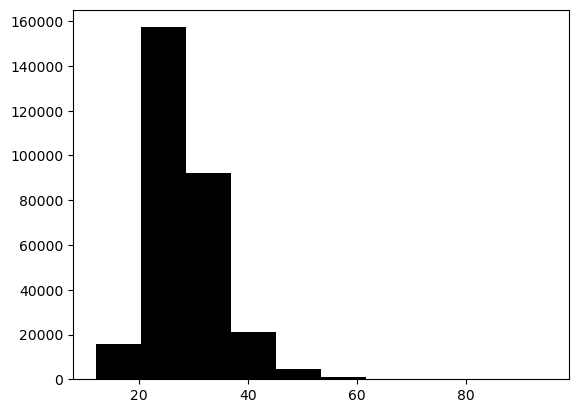

In [21]:
plt.hist(df["BMI"],color= "black")
plt.show()

Grafiğimiz pozitif kuyruk şeklinde olduğu için eksik verileri medyan ile doldurmak daha mantıklı olacaktır.

In [22]:
df.fillna({"BMI":df["BMI"].median()},inplace=True)

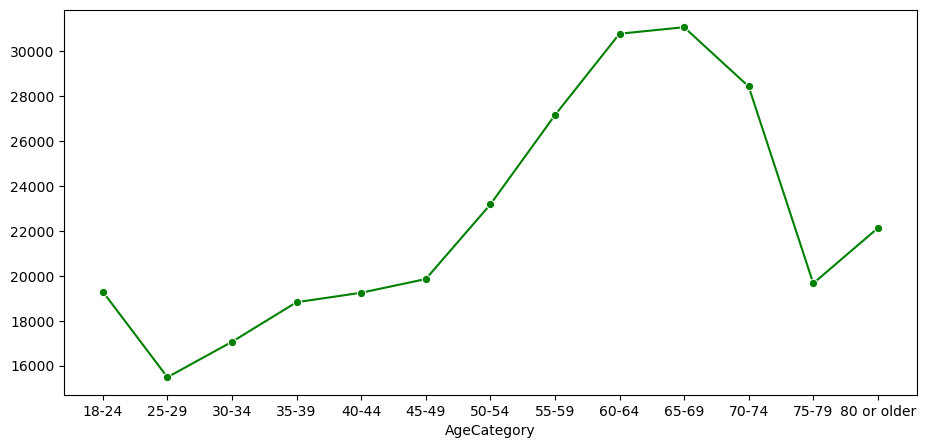

In [23]:
Age_value = df["AgeCategory"].value_counts()
plt.figure(figsize=(11,5))
sns.lineplot(x=Age_value.index,y=Age_value.values,marker="o",color="green") # medyan kullanarak doldur
plt.xticks(ticks=[1,2,3,4,5,6,7,8,9,10,11,12,13], labels= AgeCategory_new)
plt.show()

In [24]:
df.fillna({"AgeCategory":df["AgeCategory"].median()},inplace=True)

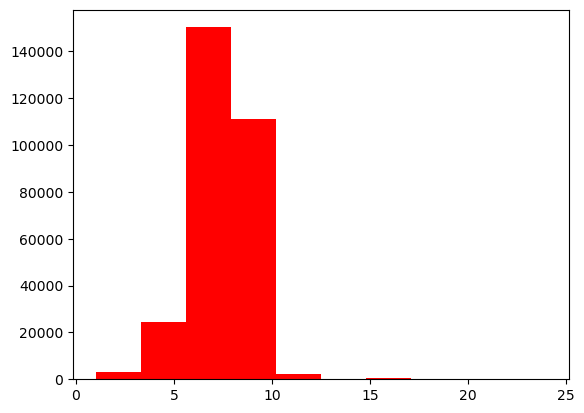

In [25]:
plt.hist(df["SleepTime"],color="red")
plt.show()

In [26]:
df.fillna({"SleepTime":df["SleepTime"].median()},inplace=True)

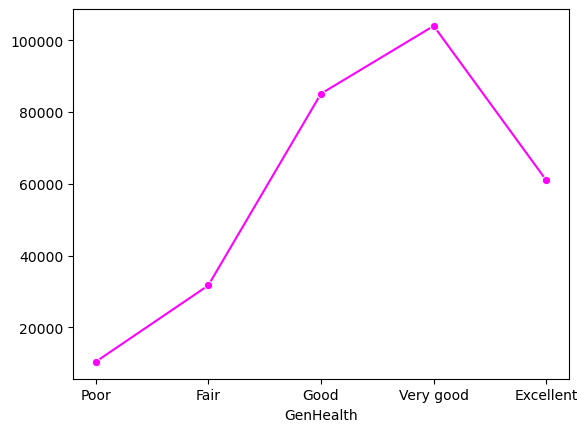

In [27]:
value = df["GenHealth"].value_counts() 
sns.lineplot(x=value.index,y=value.values, marker = "o",color="magenta")
plt.xticks(ticks=[1,2,3,4,5], labels= GenHealt_new) 
plt.show()

Bu grafik bize her ne kadar ilk bakışta negatif kuyruklu gibi gözüksede simetriğe yakın olduğu içinde hem mod hemde medyan değerlerimiz eşit çıkacaktır.

In [28]:
print(f"Verinin medyanı {df["GenHealth"].median()}")
print(f"Verinin modu {df["GenHealth"].mode()}")

Verinin medyanı 4.0
Verinin modu 0    4.0
Name: GenHealth, dtype: float64


In [29]:
df.fillna({"GenHealth":df["GenHealth"].median()},inplace=True)

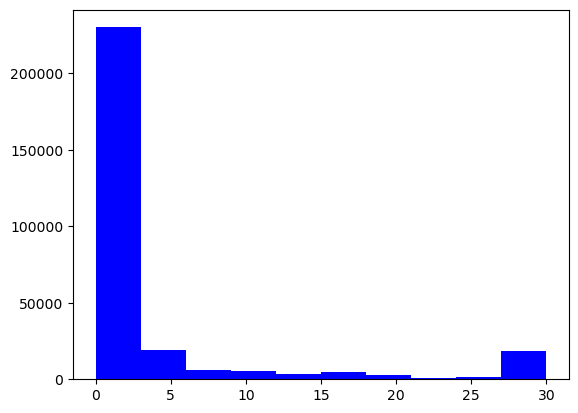

In [30]:
plt.hist(df["PhysicalHealth"],color="blue")
plt.show()

In [31]:
df.fillna({"PhysicalHealth":df["PhysicalHealth"].median()},inplace=True)

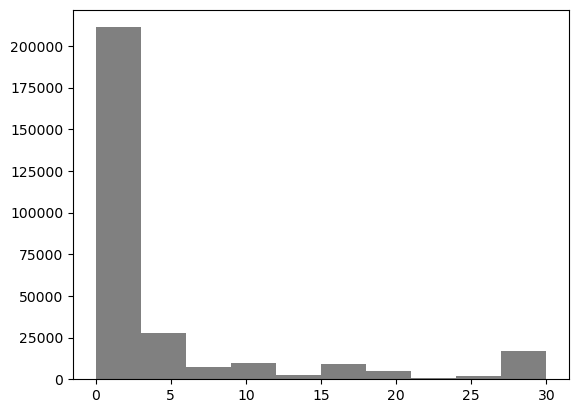

In [32]:
plt.hist(df["MentalHealth"],color="grey")
plt.show()

In [33]:
df.fillna({"MentalHealth":df["MentalHealth"].median()},inplace=True)

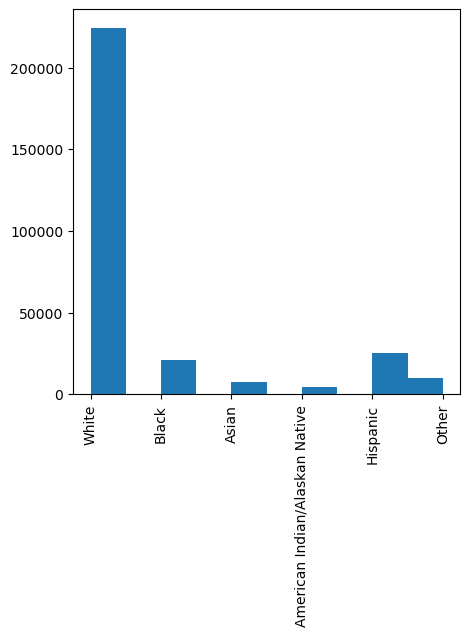

In [34]:
plt.figure(figsize=(5,5))
plt.hist(df["Race"])
plt.xticks(ticks=[1,2,3,4,5,6], labels=Race_new, rotation=90)
plt.show()

In [35]:
df.fillna({"Race":df["Race"].median()},inplace=True)

In [36]:
df.isna().sum() #Tüm numerik veriler temizlenmiş mi diye kontrol ediyoruz.

HeartDisease           0
BMI                    0
Smoking             8920
AlcoholDrinking     8950
Stroke              8936
PhysicalHealth         0
MentalHealth           0
DiffWalking         8911
Sex                    0
AgeCategory            0
Race                   0
Diabetic            8945
PhysicalActivity    8939
GenHealth              0
SleepTime              0
Asthma              8998
KidneyDisease       8829
SkinCancer          8833
dtype: int64

"df.isnull().sum()" şeklinde de yazabilirdik ama numerik verileri kontrol ettiğimiz için "NaN" yani "Not a Number" olup olmadığını öğrenmek teknik açıdan daha iyidir.

In [37]:
df.fillna({"Smoking":df["Smoking"].mode()[0]},inplace=True)
df.fillna({"AlcoholDrinking":df["AlcoholDrinking"].mode()[0]},inplace=True)
df.fillna({"Stroke":df["Stroke"].mode()[0]},inplace=True)
df.fillna({"DiffWalking":df["DiffWalking"].mode()[0]},inplace=True)
df.fillna({"Diabetic":df["Diabetic"].mode()[0]},inplace=True)
df.fillna({"PhysicalActivity":df["PhysicalActivity"].mode()[0]},inplace=True)
df.fillna({"Asthma":df["Asthma"].mode()[0]},inplace=True)
df.fillna({"KidneyDisease":df["KidneyDisease"].mode()[0]},inplace=True)
df.fillna({"SkinCancer":df["SkinCancer"].mode()[0]},inplace=True)

In [38]:
df.isnull().sum() #Tüm verilerin temizlendiğinden emin olmak için son bir göz atıyoruz.

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [39]:
df.head(10) # Veri Setimizin son haline kısa bir göz atalım.

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0.0,16.60,True,False,False,3.0,30.0,False,1.0,8.0,1.0,True,True,4.0,5.0,True,False,True
1,0.0,20.34,False,False,True,0.0,0.0,False,1.0,13.0,1.0,False,True,4.0,7.0,False,False,False
2,0.0,26.58,True,False,False,20.0,30.0,False,0.0,10.0,1.0,True,True,2.0,8.0,True,False,False
3,0.0,24.21,False,False,False,0.0,0.0,False,1.0,12.0,1.0,False,True,3.0,6.0,False,False,True
4,0.0,23.71,False,False,False,28.0,0.0,True,1.0,8.0,1.0,False,True,4.0,8.0,False,False,False
5,1.0,28.87,True,False,False,6.0,0.0,True,1.0,12.0,2.0,False,False,2.0,12.0,False,False,False
6,0.0,21.63,False,False,False,15.0,0.0,False,1.0,11.0,1.0,False,True,4.0,4.0,True,False,True
7,0.0,31.64,True,False,False,5.0,0.0,True,1.0,13.0,1.0,True,False,3.0,9.0,True,False,False
8,0.0,26.45,False,False,False,0.0,0.0,False,1.0,13.0,1.0,False,False,2.0,5.0,False,True,False
9,0.0,40.69,False,False,False,0.0,0.0,True,0.0,10.0,1.0,False,True,3.0,10.0,False,False,False


## 2. Sürekli Değişken Analizi

Sürekli değişken yani sayısal değerlerin analizinin yapıldığı bölümdür.
 
 Sütunlarımızda çok fazla veri bulunduğu için grafiklerimiz boğucu ve anlamsız gözükebilir fakat öyle değillerdir.

 NOT: Neden "selecet_dtypes("float64")" fonksiyonu kullanmadığımdan bahsetmek gerekirse; kategorik verilerimizdeki eksik verileri daha rahat görselleştirmek ve temizlemek adına onları numaralandırmıştık. Ondan dolayı bu fonksiyonu kullandığımızda bazı sütunlarında "float64" tipinde gözükebilir. Sürekli değişken analizimizde bu sütunları istemediğimizden dolayı sayısal veri içeren sütunlarımızı el ile girdik.

In [40]:
df_numerical = df[["BMI", "SleepTime","PhysicalHealth","MentalHealth"]]
df_numerical.head()

,BMI,SleepTime,PhysicalHealth,MentalHealth
0,16.60,5.0,3.0,30.0
1,20.34,7.0,0.0,0.0
2,26.58,8.0,20.0,30.0
3,24.21,6.0,0.0,0.0
4,23.71,8.0,28.0,0.0


In [41]:
df_numerical.describe().T

,count,mean,std,min,25%,50%,75%,max
BMI,301136.0,28.299578,6.267447,12.02,24.13,27.34,31.25,94.85
SleepTime,301136.0,7.093752,1.416430,1.00,6.00,7.00,8.00,24.00
PhysicalHealth,301136.0,3.271130,7.850367,0.00,0.00,0.00,2.00,30.00
MentalHealth,301136.0,3.793695,7.873585,0.00,0.00,0.00,3.00,30.00


In [42]:
##sns.FacetGrid(data = df, hue = list(GenHealt_new.keys()), height = 7, xlim = (0, 20)).map(sns.kdeplot, "SleepTime", fill = True).add_legend();

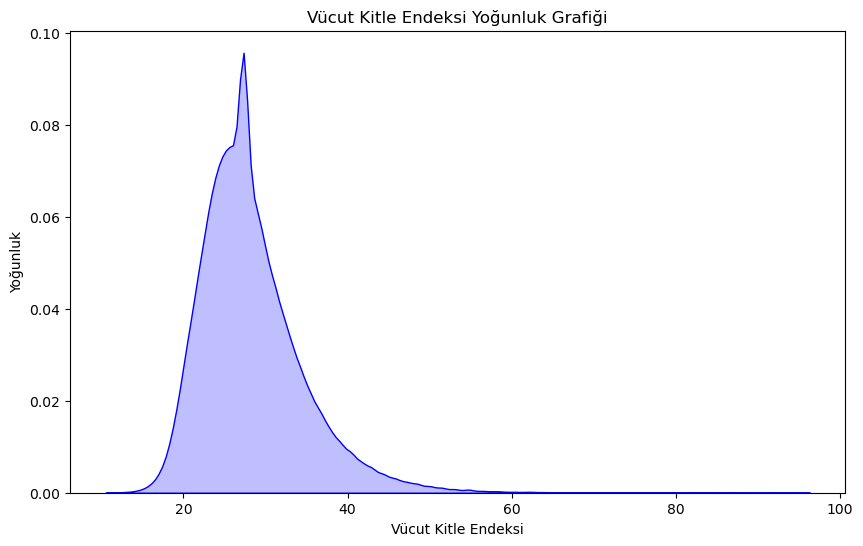

In [43]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['BMI'], fill=True, color='blue')
plt.title('Vücut Kitle Endeksi Yoğunluk Grafiği')
plt.xlabel('Vücut Kitle Endeksi')
plt.ylabel('Yoğunluk')
plt.show()


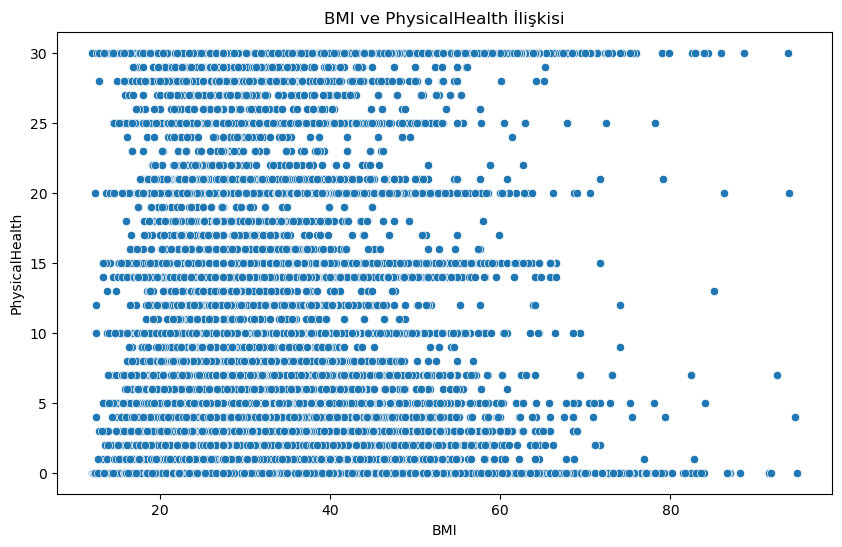

In [44]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['BMI'], y=df['PhysicalHealth'])
plt.title('BMI ve PhysicalHealth İlişkisi')
plt.xlabel('BMI')
plt.ylabel('PhysicalHealth')
plt.show()


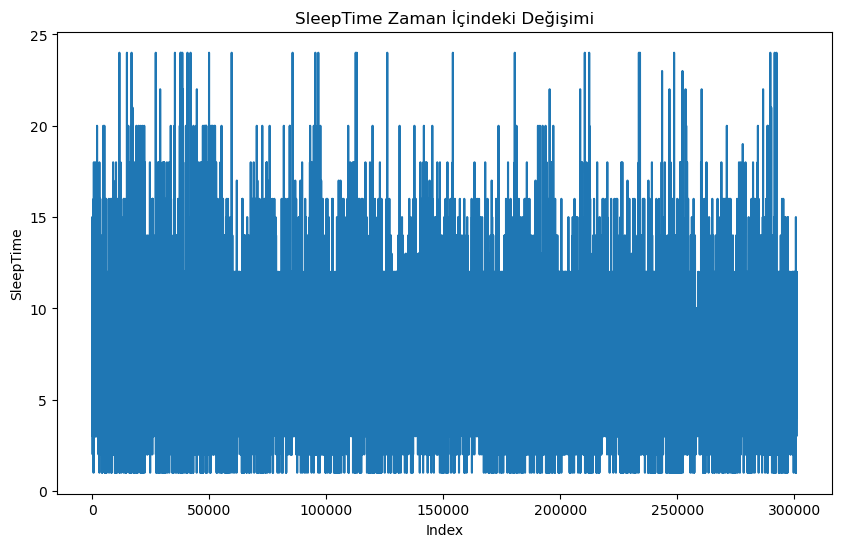

In [45]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x=range(len(df)), y='SleepTime')
plt.title('SleepTime Zaman İçindeki Değişimi')
plt.xlabel('Index')
plt.ylabel('SleepTime')
plt.show()

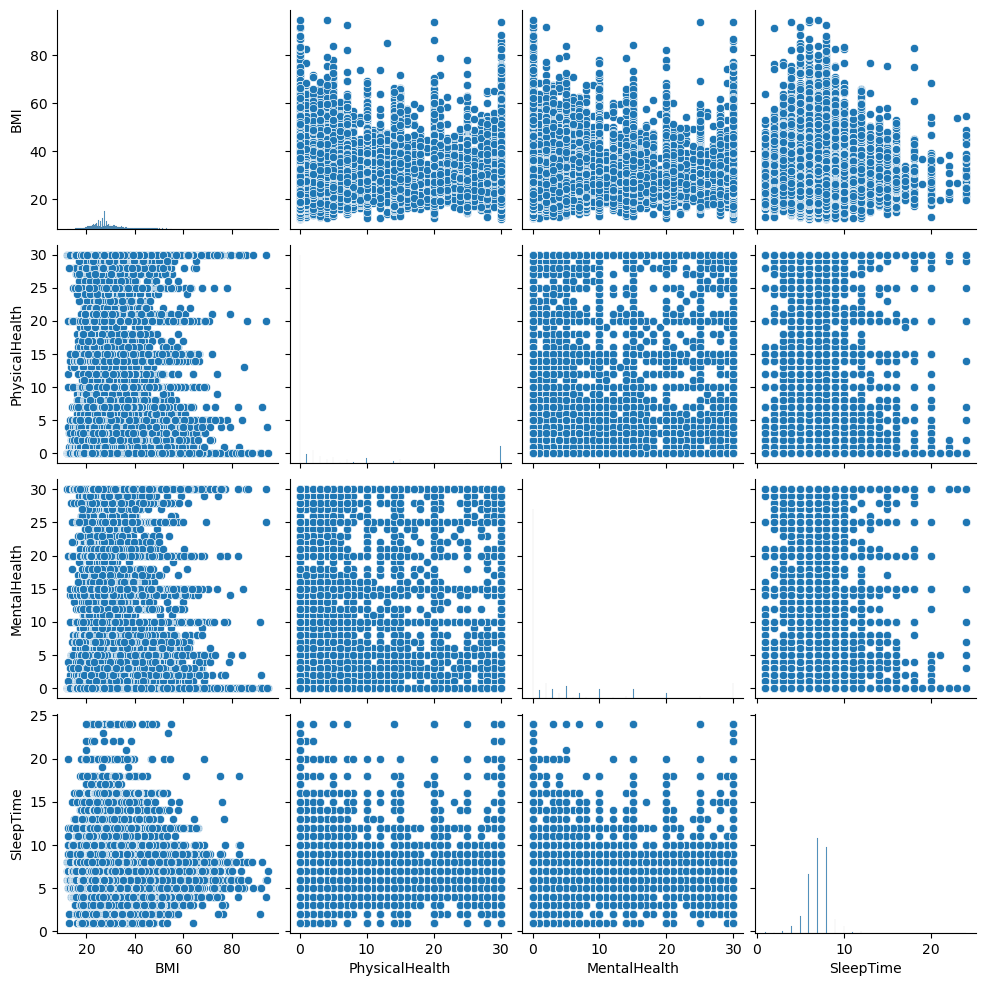

In [46]:
sns.pairplot(df[['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']])
plt.show()

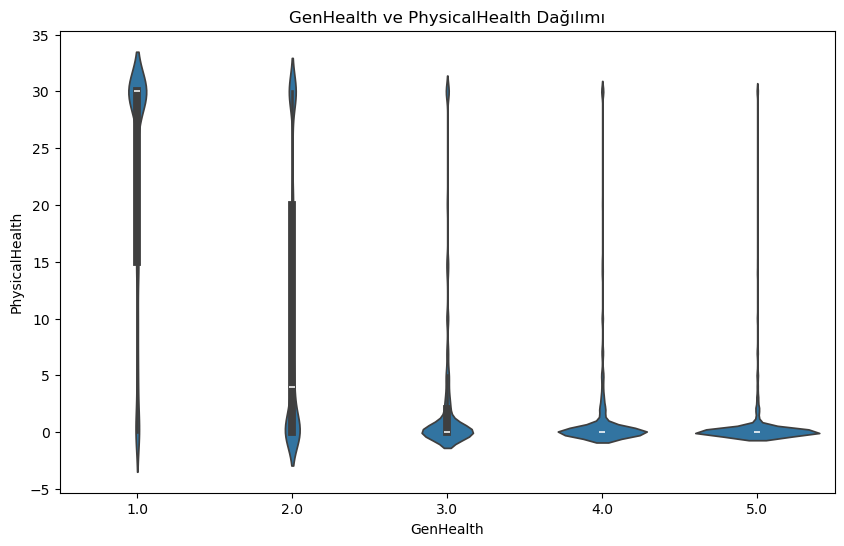

In [47]:
plt.figure(figsize=(10, 6))
sns.violinplot(x=df['GenHealth'], y=df['PhysicalHealth'])
plt.title('GenHealth ve PhysicalHealth Dağılımı')
plt.show()

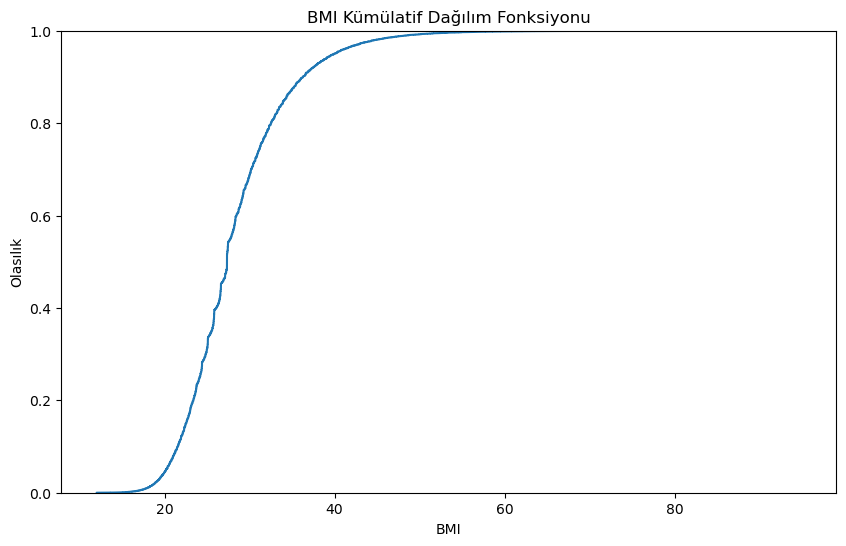

In [48]:
plt.figure(figsize=(10, 6))
sns.ecdfplot(df['BMI'])
plt.title('BMI Kümülatif Dağılım Fonksiyonu')
plt.xlabel('BMI')
plt.ylabel('Olasılık')
plt.show()

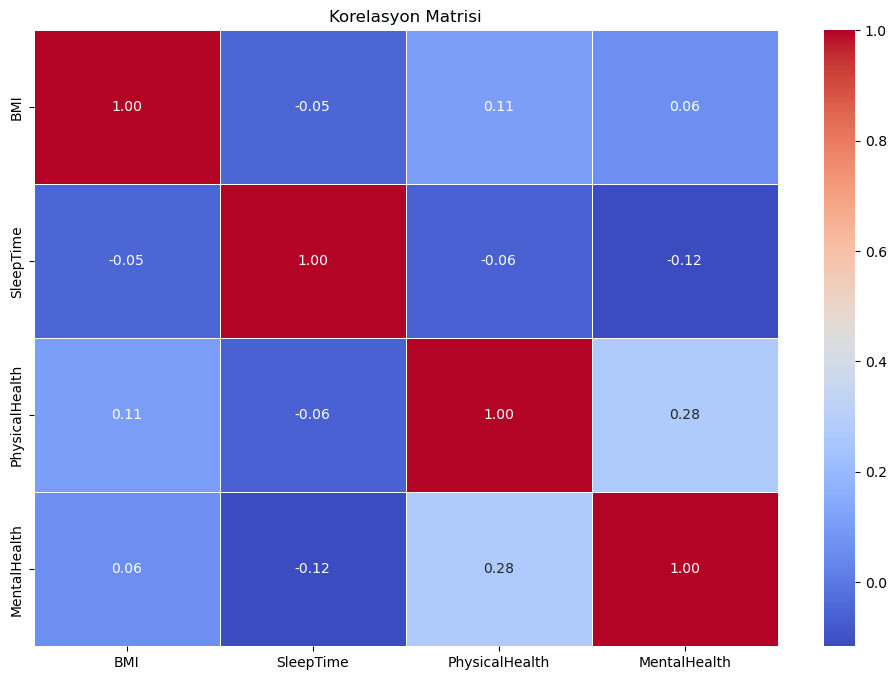

In [49]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_numerical.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Korelasyon Matrisi")
plt.show()

## 3. Kategorik Değişken Analizi

Bu bölümde ise kategorik verilerimizin analizlerini yapıyoruz. 

In [50]:
df_categorical = df[[col for col in df.columns if col not in df_numerical]]
df_categorical.head()

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
0,0.0,True,False,False,False,1.0,8.0,1.0,True,True,4.0,True,False,True
1,0.0,False,False,True,False,1.0,13.0,1.0,False,True,4.0,False,False,False
2,0.0,True,False,False,False,0.0,10.0,1.0,True,True,2.0,True,False,False
3,0.0,False,False,False,False,1.0,12.0,1.0,False,True,3.0,False,False,True
4,0.0,False,False,False,True,1.0,8.0,1.0,False,True,4.0,False,False,False


Bir hipotez tezi testi olarak geçen "T-Stat" testi iki kategorik veri arasında uygulanır.

* "t_stat" değeri bize iki grup arasındaki farkın standart biçiminde gösterir.
* "p" değeri ise bu farkın rastlantısal olma farkını gösterir.

"p" değerimiz "0.0" olmasından çıkan sonuç bize cinsiyet ve kalp hastalığı olması arasında kuvvetli bir ilişki olduğunu gösterir. 

In [51]:
erkek_veri = df[df["Sex"] == 0]["HeartDisease"]
kadin_veri = df[df["Sex"] == 1]["HeartDisease"]

t_stat, p = ttest_ind(erkek_veri, kadin_veri)

print(f"t-test değeri {t_stat}")
print(f"p değeri {p}")

if p < 0.05:
    print("Cinsiyet ile kalp hastalığı arasında anlamlı bir ilişki vardır")
else:
    print("Cinsiyet ile kalp hastalığı arasında anlamlı bir ilişki yoktur")

t-test değeri 38.29558346163622
p değeri 0.0
Cinsiyet ile kalp hastalığı arasında anlamlı bir ilişki vardır


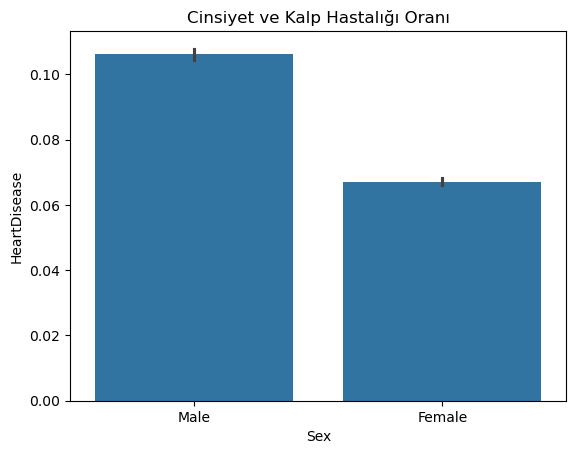

In [52]:
sns.barplot(x="Sex", y="HeartDisease", data=df)
plt.xticks(ticks=[0,1], labels=Sex_new)
plt.title("Cinsiyet ve Kalp Hastalığı Oranı")
plt.show()

In [53]:
chi2, p, dof, expected = chi2_contingency(pd.crosstab(df["GenHealth"], df["HeartDisease"]))

print(f"chi2 değeri {t_stat}")
print(f"p değeri {p}")

if p < 0.05:
    print("Genel sağlık ile kalp hastalığı arasında anlamlı bir ilişki vardır")
else:
    print("Genel sağlık ile kalp hastalığı arasında anlamlı bir ilişki yoktur")

chi2 değeri 38.29558346163622
p değeri 0.0
Genel sağlık ile kalp hastalığı arasında anlamlı bir ilişki vardır


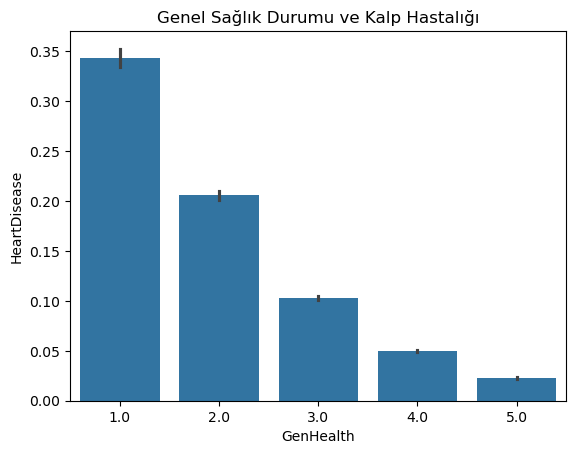

In [54]:
sns.barplot(x='GenHealth', y='HeartDisease', data=df)
plt.title("Genel Sağlık Durumu ve Kalp Hastalığı")
plt.show()

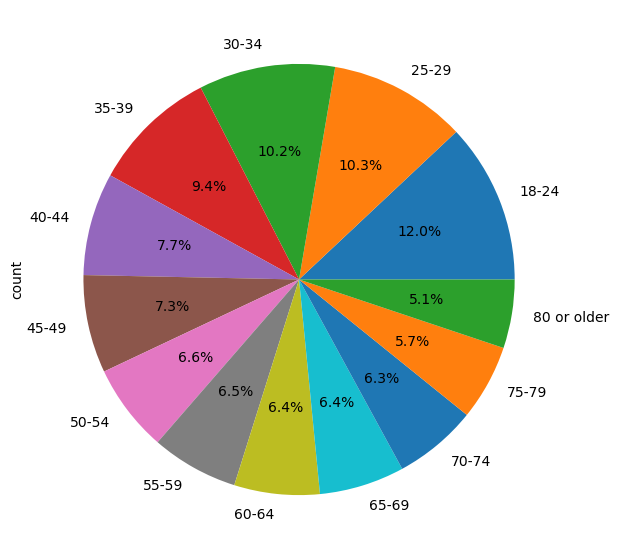

In [55]:
## Veri Setimizdeki yaş aralıklarının yüzdeliksel olarak pasta grafiğinde gösterimi

freq = df["AgeCategory"].value_counts()
freq.plot.pie(autopct="%1.1f%%", startangle= 0, figsize=(7,7),labels = AgeCategory_new)
plt.ylabel=""
plt.suptitle="Yas Araligi Grafigi"
plt.show()

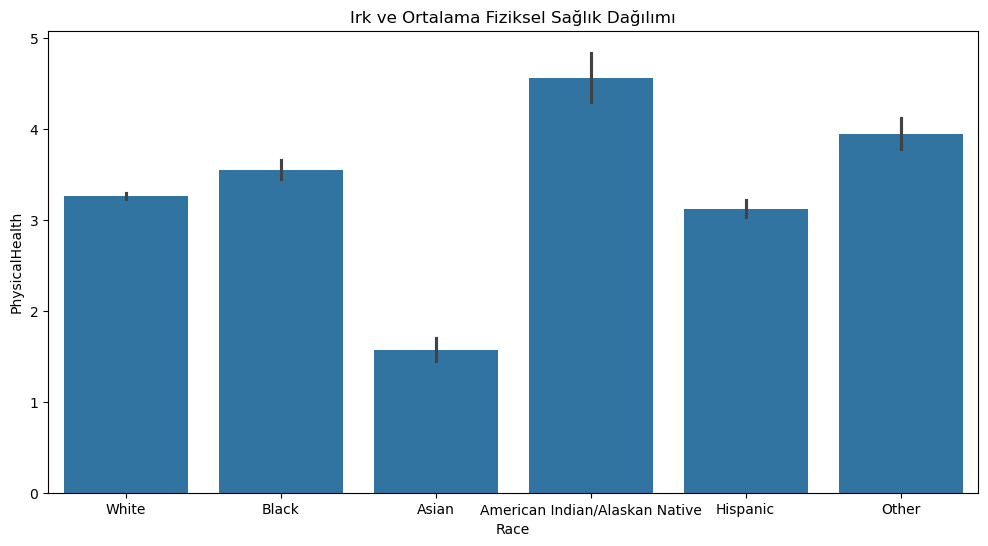

In [56]:
plt.figure(figsize=(12, 6))
sns.barplot(x="Race", y="PhysicalHealth", data=df)
plt.xticks(ticks=[0,1,2,3,4,5], labels=Race_new)
plt.title("Irk ve Ortalama Fiziksel Sağlık Dağılımı")
plt.show()

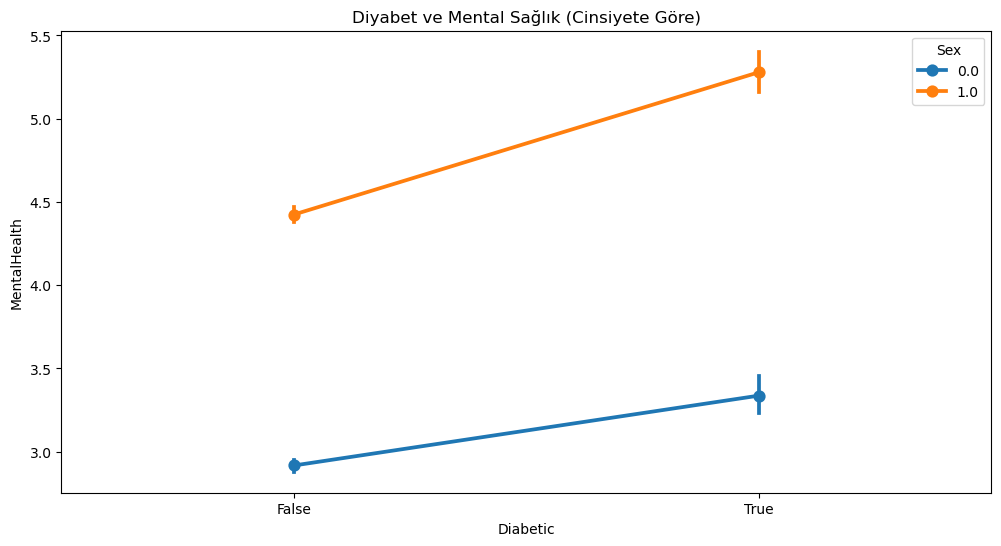

In [57]:
plt.figure(figsize=(12, 6))
sns.pointplot(x='Diabetic', y='MentalHealth', hue="Sex", data=df)
plt.title('Diyabet ve Mental Sağlık (Cinsiyete Göre)')
plt.show()

<Figure size 600x600 with 0 Axes>

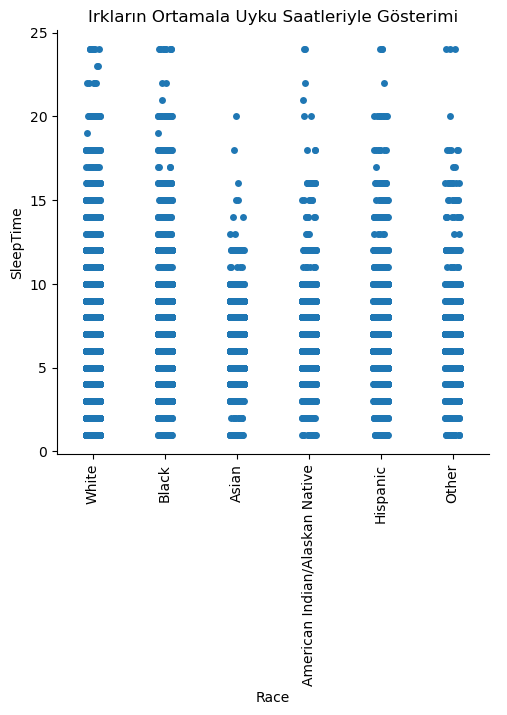

In [58]:
plt.figure(figsize=(6,6))
sns.catplot(data = df, x = "Race", y = "SleepTime")
plt.xticks(ticks=[0,1,2,3,4,5], labels= Race_new , rotation = 90)
plt.title("Irkların Ortamala Uyku Saatleriyle Gösterimi")
plt.show()

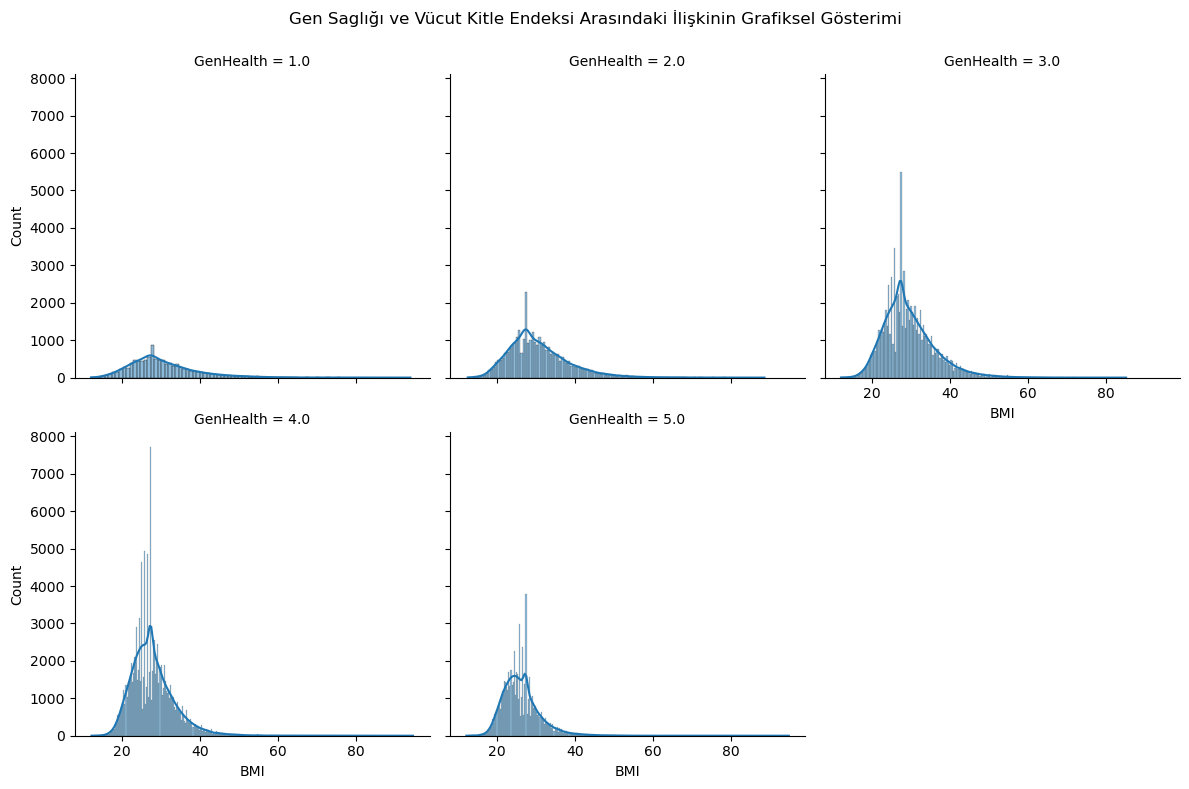

In [59]:
g = sns.FacetGrid(df, col="GenHealth", col_wrap=3, height=4)
g.map(sns.histplot, "BMI", kde=True)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Gen Saglığı ve Vücut Kitle Endeksi Arasındaki İlişkinin Grafiksel Gösterimi')
plt.show()

## 4. Feature Engineering

Bu kısımda veri setindeki özellikleri kullanarak yeni tür özellikler üretilmiştir.

1) Eğer kişi sigara tüketiyorsa ve ortalam uyku saati 5 saatin altındaysa kişi stresli olabilir.
2) Kişilerin yaş kategorilerine göre "Genç, Orta, Yaşlı" olarak sınıflandırılması
3) Eğer kişinin vücut kitle endeksi 30'un üstündeyse ve diyabeti varsa Tip-2 diyabet olabilir. Çünkü Tip-2 diyabeti sahip olan kişilerin %80'i obez olarak sınıflandırılır.

In [60]:
def Stressed(stress):
    if stress["Smoking"] == True and stress["SleepTime"] < 5:
        return True
    else:
        return False
df["IsStressed"] = df.apply(Stressed,axis=1)
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,IsStressed
0,0.0,16.60,True,False,False,3.0,30.0,False,1.0,8.0,1.0,True,True,4.0,5.0,True,False,True,False
1,0.0,20.34,False,False,True,0.0,0.0,False,1.0,13.0,1.0,False,True,4.0,7.0,False,False,False,False
2,0.0,26.58,True,False,False,20.0,30.0,False,0.0,10.0,1.0,True,True,2.0,8.0,True,False,False,False
3,0.0,24.21,False,False,False,0.0,0.0,False,1.0,12.0,1.0,False,True,3.0,6.0,False,False,True,False
4,0.0,23.71,False,False,False,28.0,0.0,True,1.0,8.0,1.0,False,True,4.0,8.0,False,False,False,False


In [61]:
def ageclass(age):
    if age<= 4:
        return "Young"
    elif 4<age<=8:
        return "Middle Age"
    else:
        return "Old"
df["AgeClass"] = df["AgeCategory"].apply(ageclass)
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,IsStressed,AgeClass
0,0.0,16.60,True,False,False,3.0,30.0,False,1.0,8.0,1.0,True,True,4.0,5.0,True,False,True,False,Middle Age
1,0.0,20.34,False,False,True,0.0,0.0,False,1.0,13.0,1.0,False,True,4.0,7.0,False,False,False,False,Old
2,0.0,26.58,True,False,False,20.0,30.0,False,0.0,10.0,1.0,True,True,2.0,8.0,True,False,False,False,Old
3,0.0,24.21,False,False,False,0.0,0.0,False,1.0,12.0,1.0,False,True,3.0,6.0,False,False,True,False,Old
4,0.0,23.71,False,False,False,28.0,0.0,True,1.0,8.0,1.0,False,True,4.0,8.0,False,False,False,False,Middle Age


In [62]:
def type2(diabet):
    if diabet["Diabetic"] == True and diabet["BMI"] >= 30:
        return True
    else:
        return False
df["Type2_Diabetic"] = df.apply(type2, axis=1)
df[df["Type2_Diabetic"] == True]

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,IsStressed,AgeClass,Type2_Diabetic
7,0.0,31.64,True,False,False,5.0,0.0,True,1.0,13.0,...,True,False,3.0,9.0,True,False,False,False,Old,True
10,1.0,34.30,True,False,False,30.0,0.0,True,0.0,9.0,...,True,False,1.0,15.0,True,False,False,False,Old,True
29,0.0,36.58,False,False,False,0.0,0.0,False,1.0,9.0,...,True,False,3.0,5.0,False,False,False,False,Old,True
32,0.0,45.35,False,False,False,30.0,0.0,True,0.0,11.0,...,True,False,3.0,7.0,False,False,False,False,Old,True
35,1.0,32.98,True,False,True,10.0,0.0,True,0.0,12.0,...,True,True,1.0,4.0,False,False,True,True,Old,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319738,0.0,37.59,True,False,False,0.0,0.0,True,0.0,9.0,...,True,False,2.0,8.0,False,True,False,False,Old,True
319739,1.0,35.02,False,False,False,15.0,0.0,False,0.0,9.0,...,True,True,2.0,8.0,False,True,False,False,Old,True
319763,0.0,30.11,True,False,False,30.0,0.0,False,0.0,9.0,...,True,False,2.0,7.0,False,False,False,False,Old,True
319767,1.0,36.21,True,False,False,0.0,0.0,True,1.0,12.0,...,True,True,3.0,8.0,False,False,False,False,Old,True


## 5. Sonuç ve Öneriler

#### Proje Senaryosu: 

* Bu çalışma, HeartDisease veri seti üzerinden analiz edilmiştir. Bu veri seti, bireylerin sağlık durumlarıyla ilgili çok sayıda değişken içermektedir ve kalp hastalığı riski üzerine odaklanmaktadır. Analizlerin amacı, bireylerin belirli sağlık verileri (örneğin, uyku süresi, sigara kullanımı, şeker hastalığı geçmişi, fiziksel aktivite düzeyi) ışığında kalp hastalığına yatkınlığını tahmin eden bir model geliştirmektir.

#### Problemin Çözüme Yönelik Potansiyeli
##### Sağlık Sektöründe Proaktif Çözümler:

* Bu veri seti, bireylerin sağlık durumları, yaşam alışkanlıkları ve demografik özellikleriyle kalp hastalığı gibi ciddi sağlık sorunları arasındaki ilişkileri anlamak için önemli bir kaynak sunuyor. İçerdiği bilgiler, halk sağlığını iyileştirmek ve bireylerin yaşam kalitesini artırmak adına farklı problemlerin çözümüne yönelik olarak kullanılabilir.

#### Risk Tahmini ve Önleyici Sağlık Politikaları:


 Veride yer alan sigara kullanımı, diyabet, uyku süresi ve genel sağlık durumu gibi değişkenler, kalp hastalığı gibi riskli durumların önceden tahmin edilmesini sağlayabilir. Örneğin, sigara içme alışkanlığı olan veya uyku süresi yetersiz bireyler, daha yüksek risk grubunda değerlendirilebilir. Bu analizler, bireysel sağlık taramalarında ve risk grubundaki kişilere özel tedbirlerin alınmasında kullanılabilir.

##### Eğitim ve Farkındalık Programları:
Elde edilen analizlerle, sigara kullanımı, fiziksel aktivite eksikliği veya düzensiz uyku gibi faktörlerin sağlık üzerindeki olumsuz etkileri daha iyi anlaşılabilir. Bu tür bilgiler, toplum genelinde farkındalık yaratmak ve sağlıklı yaşam alışkanlıklarını teşvik etmek amacıyla kullanılabilir. Örneğin, diyabetin fiziksel sağlık üzerindeki etkilerini vurgulayan eğitim programları geliştirilebilir.

#### Sağlık Hizmetlerinin Daha Etkin Yönetimi:
Sağlık hizmeti sunan kurumlar, bu analizlerden elde edilen bilgilerle kaynaklarını daha etkin bir şekilde yönetebilir. Örneğin, kalp hastalığı riski yüksek bireylerin daha sık kontrol edilmesi veya belirli bölgelerdeki sağlık kampanyalarının yoğunlaştırılması sağlanabilir.

#### Bireysel ve Toplumsal Sağlık Stratejileri:
Veri setinden elde edilen bulgular, bireylerin sağlık durumlarını iyileştirmek için uygulanabilir stratejiler geliştirilmesine yardımcı olabilir. Özellikle uyku süresi ve fiziksel aktivite gibi bireyin kontrol edebileceği faktörlerin üzerinde durularak yaşam kalitesinin artırılması hedeflenebilir.

#### Hedefli Kamu Sağlığı Yatırımları:
Elde edilen bilgiler, kamu sağlığına yönelik yatırımların doğru alanlara yönlendirilmesine katkı sağlayabilir. Örneğin, diyabet oranı yüksek bireylerin olduğu bölgelerde, bu sağlık sorununa yönelik klinik hizmetlerinin artırılması planlanabilir.

##### _Sonuç olarak, bu veri seti sadece bireysel düzeyde değil, aynı zamanda toplum genelinde uygulanabilecek stratejilere rehberlik edebilecek büyük bir potansiyele sahiptir. Sağlık riski yüksek bireylerin belirlenmesi ve bu bireylere yönelik kişiselleştirilmiş yaklaşımlar, hem bireylerin yaşam kalitesini artırabilir hem de sağlık hizmetlerinin etkinliğini artırabilir._


#### Analiz Sonuçları:
* Cinsiyet ve Kalp Hastalığı Arasındaki İlişki:

 Cinsiyet, kalp hastalığı riskini belirlemede anlamlı bir faktör olarak bulunmuştur (p < 0.05). Erkek bireylerde risk daha yüksek gözükmektedir.
* GenHealth ve Kalp Hastalığı Arasındaki İlişki:

 Genel sağlık durumu kötü olarak değerlendirilen bireylerin kalp hastalığı riski oldukça yüksektir. Bu değişkenin modelde güçlü bir etken olduğu tespit edilmiştir.

* En fazla bulunan yaş aralığı ise %12 ile "18-24" yaş aralığıdır.
* "American Indian/Alaskan Native" ırkı yani "Amerikan Kızılderelileri" olarak geçen ırk fiziksel sağlık bakımından en sağlıklı olanlarıdır.
* Korelasyon matrisinde numerikal verilerin birbirleriyle ilişkisi olmadığı gözlemlenmiştir.
#### Makine Öğrenmesi Model Önerisi
Problemin çözümü için önereceğim makine öğrenmesi modeli "Classification Algorithms - Sınıflandırma Algoritmaları" olacaktır, çünkü hedef değişkenimiz ikili (binary) kategoriktir (HeartDisease: 0 veya 1)